Import and preprocess the dataset.

In [1]:
import pandas as pd

# Load dataset from  local file
housing_data = pd.read_csv("Housing.csv")  
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
housing_data.info()
housing_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Split data into train-test sets.

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = housing_data.drop('price', axis=1)  # Features
y = housing_data['price']               # Target

#  For ML models, convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

#  Display shape
print("Training feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training feature shape: (436, 13)
Test feature shape: (109, 13)
Training target shape: (436,)
Test target shape: (109,)


Fit a Linear Regression model using sklearn.linear_model and Evaluate model using MAE, MSE, R².

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Initialize model
lr_model = LinearRegression()

#  Train the model on training data
lr_model.fit(X_train, y_train)

#  Predict on test data
y_pred = lr_model.predict(X_test)

#  Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


✅ Linear Regression Results:
Mean Squared Error (MSE): 1754318687330.6643
R² Score: 0.6529242642153184


In [11]:
from sklearn.metrics import mean_absolute_error

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 970043.4039201637


Plot regression line and interpret coefficients.

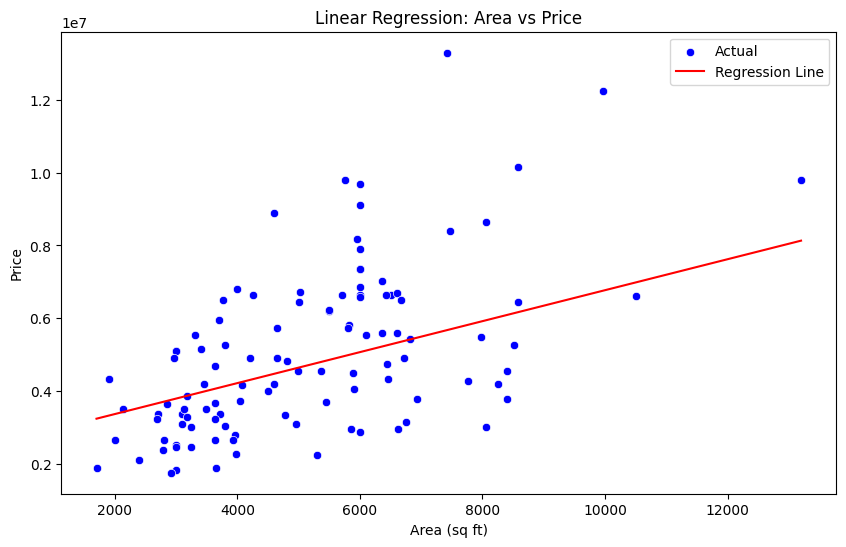

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a feature to plot against price
feature = "area"

# Train a simple linear model with only 'area'
single_feature_model = LinearRegression()
single_feature_model.fit(X_train[[feature]], y_train)

# Predict on test data for plotting
y_pred_area = single_feature_model.predict(X_test[[feature]])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[feature], y=y_test, color="blue", label="Actual")
sns.lineplot(x=X_test[feature], y=y_pred_area, color="red", label="Regression Line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Linear Regression: Area vs Price")
plt.legend()
plt.show()


In [13]:
# Coefficient table
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)


                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
